### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 6.2.1 Random Forest Regressor
## White Wine, Outliers Removed, Not Balanced

#### Audrey Hughes Rager
#### March 24, 2021



In [39]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

sns.set_style('whitegrid')

## Data Wrangling

### Import Data

In [40]:
#Import csv files into Pandas data frames
df = pd.read_csv('winequality-white-outliers-removed.csv',sep=";")


### EDA


In [41]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,2509.315363,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,1414.165983,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,0.000000,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,1269.000000,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,2588.000000,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,3731.500000,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,4897.000000,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


In [42]:
df = df.drop('Unnamed: 0',axis=1)

In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


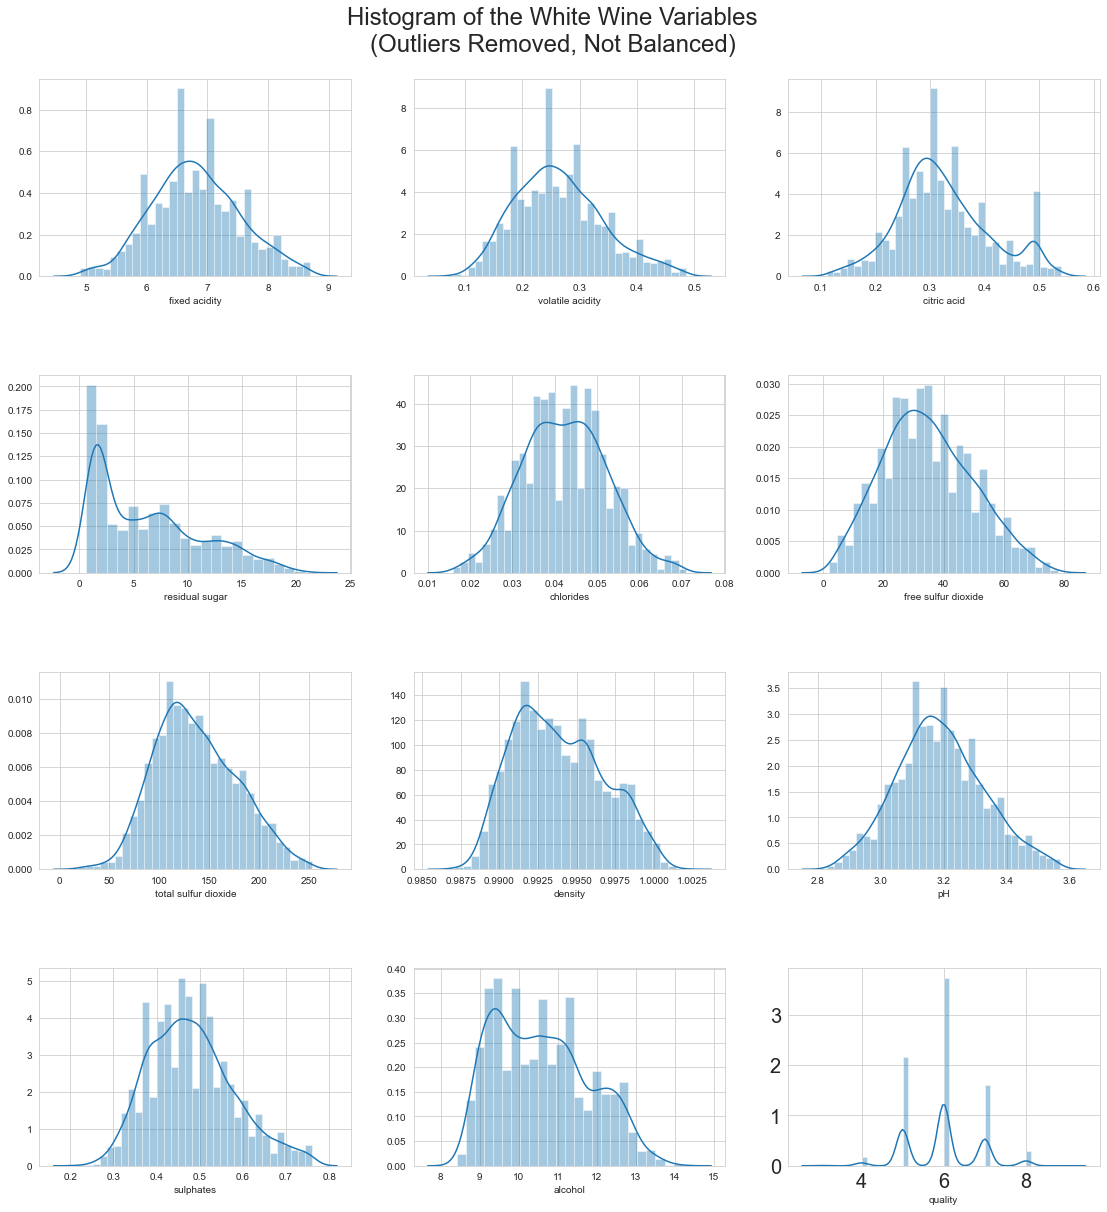

In [61]:
#Historgrams  - outliers removed (df)
def subplot_histplot(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_histplot(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variables\n(Outliers Removed, Not Balanced)")


### Train-Test-Split

In [45]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### Scale Independent Variables

In [47]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



# RandomForestRegressor

sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# Instantiate the Random Forest Regressor Model

In [48]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth=20, min_samples_leaf=50, random_state = 42)

# Fit the Model to the Training Data

In [49]:
rfrModel = rfr.fit(X_train,y_train)

# Predict Using Test Data

In [50]:
y_pred = rfrModel.predict(X_test)

In [51]:
print(y_pred)

[6.17101088 5.3351805  6.68419305 6.60430681 6.35355541 5.42235866
 5.33471702 5.79548565 6.54200756 5.36776966 6.83366797 5.68670803
 6.48052481 6.06534927 5.98685769 5.9013008  5.44180907 5.74187769
 5.6368413  5.49168162 5.21876505 6.29995129 6.03028761 6.62896658
 6.17060567 6.70618425 6.11400559 5.83203519 6.63434914 6.4845837
 6.22481404 6.3458852  5.74187769 5.75573228 5.71940934 6.03551791
 5.68373197 5.70973547 6.57216535 4.98405081 6.14855783 5.75646814
 5.19787623 5.78524312 6.74052781 6.43434957 5.83207892 5.7460226
 6.54506656 5.15608822 6.83264347 6.06502439 5.53772642 5.85902108
 6.23796829 5.832331   5.38476485 5.56387898 6.30221343 5.88742738
 5.95839847 5.78733997 5.88780698 5.97745646 5.95821251 5.31022821
 5.92192716 5.55857938 6.82452712 5.85540454 5.73705334 5.92411187
 6.32664681 6.75972772 5.73530755 5.07974903 5.5850663  6.32238335
 5.94827328 5.29200744 6.77429246 5.65944378 6.04747045 5.21052116
 6.2688338  5.4593039  6.15539042 5.95250736 6.54163916 5.760014

In [52]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.77152794]


In [53]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.77152794]


# Evaluate Model

In [54]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [55]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.524
Mean Squared Error (MSE): 0.4432


In [56]:
importance = rfrModel.feature_importances_
importance

array([0.0191299 , 0.18099098, 0.00981886, 0.05624667, 0.0314692 ,
       0.09130979, 0.01294707, 0.01419032, 0.04357298, 0.02088839,
       0.51943583])

In [57]:
columns = X.columns

In [58]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

fixed acidity           0.019130
volatile acidity        0.180991
citric acid             0.009819
residual sugar          0.056247
chlorides               0.031469
free sulfur dioxide     0.091310
total sulfur dioxide    0.012947
density                 0.014190
pH                      0.043573
sulphates               0.020888
alcohol                 0.519436
dtype: float64

[Text(0.5, 1.0, 'White Wine Quality - Random Forest Regressor Model Visualization (Outliers Removed, Not Balanced)')]

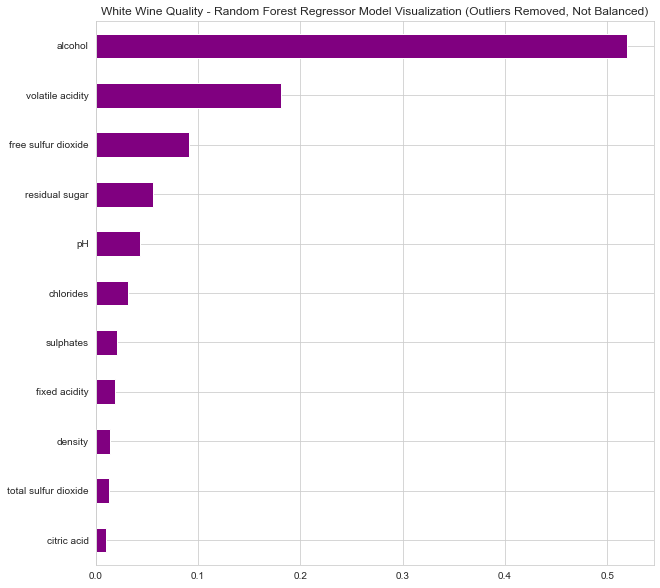

In [59]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("White Wine Quality - Random Forest Regressor Model Visualization (Outliers Removed, Not Balanced)")]

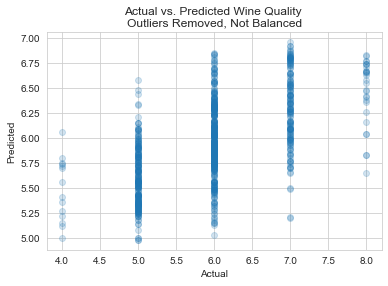

In [60]:
#Plot actual vs. predicted.


plt.scatter(y_test,y_pred,alpha=0.2)
plt.title('Actual vs. Predicted Wine Quality \nOutliers Removed, Not Balanced') #title
plt.xlabel('Actual') #x label
plt.ylabel('Predicted') #y label
plt.show()

